In [5]:
# conn.close()

In [1]:
import psycopg2
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
import pyproj

In [3]:
DBNAME = "opportunity_youth"

In [4]:
conn = psycopg2.connect(dbname=DBNAME)

In [5]:
#reproduce provided table
pd.read_sql("SELECT * FROM pums_2017 LIMIT 100;", conn)

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,2013000000006,9,01,11606,4,53,1061971,27.0,68.0,...,53.0,24.0,39.0,24.0,7.0,27.0,8.0,46.0,25.0,50.0
1,P,2013000000006,9,02,11606,4,53,1061971,22.0,66.0,...,49.0,21.0,38.0,20.0,7.0,25.0,8.0,41.0,22.0,47.0
2,P,2013000000012,9,01,10100,4,53,1061971,22.0,72.0,...,24.0,22.0,25.0,7.0,21.0,35.0,6.0,22.0,6.0,37.0
3,P,2013000000012,9,02,10100,4,53,1061971,19.0,64.0,...,21.0,18.0,19.0,7.0,17.0,29.0,6.0,19.0,6.0,29.0
4,P,2013000000038,9,01,11505,4,53,1061971,4.0,52.0,...,4.0,1.0,2.0,8.0,8.0,1.0,4.0,6.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,P,2013000001691,9,01,11602,4,53,1061971,8.0,52.0,...,3.0,8.0,12.0,2.0,3.0,7.0,8.0,13.0,8.0,7.0
96,P,2013000001691,9,02,11602,4,53,1061971,8.0,59.0,...,2.0,7.0,14.0,3.0,2.0,8.0,7.0,13.0,7.0,8.0
97,P,2013000001691,9,03,11602,4,53,1061971,8.0,14.0,...,2.0,8.0,11.0,2.0,2.0,8.0,7.0,13.0,8.0,8.0
98,P,2013000001693,9,01,11616,4,53,1061971,14.0,61.0,...,16.0,4.0,13.0,15.0,15.0,4.0,21.0,25.0,23.0,15.0


In [6]:
#select OY in South King County
QUERY = """
    SELECT *
    FROM pums_2017 ps
    JOIN puma_names_2010 pn
    ON ps.puma = pn.puma
    WHERE pn.puma SIMILAR TO '1161(0|1|2|3|4|5)'
    AND ps.agep >= 16
    AND ps.agep <= 24
    AND ps.sch = '1'
    AND ps.dis = '2'
    AND ps.esr SIMILAR TO '%(3|6)%'
    ORDER BY pn
    """
db_south = pd.read_sql(QUERY, conn)
db_south

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp78,pwgtp79,pwgtp80,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,P,2017000918811,9,02,11610,4,53,1011189,48.0,20.0,...,55.0,91.0,74.0,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
1,P,2014000712846,9,02,11610,4,53,1045195,45.0,18.0,...,16.0,17.0,36.0,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
2,P,2016001082259,9,03,11610,4,53,1029257,68.0,24.0,...,66.0,71.0,108.0,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
3,P,2017000787533,9,04,11610,4,53,1011189,50.0,22.0,...,58.0,53.0,47.0,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
4,P,2017000611914,9,04,11610,4,53,1011189,35.0,23.0,...,38.0,77.0,31.0,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,P,2014000196193,9,01,11612,4,53,1045195,25.0,23.0,...,26.0,23.0,7.0,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."
318,P,2015000388217,9,03,11612,4,53,1035988,39.0,18.0,...,38.0,10.0,12.0,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."
319,P,2014000841313,9,03,11612,4,53,1045195,13.0,21.0,...,11.0,12.0,4.0,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."
320,P,2014000598099,9,01,11612,4,53,1045195,49.0,21.0,...,53.0,51.0,16.0,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."


In [7]:
#upload king county data (for mapping underlay/ county outline purposes)
filename = "../../data/2010_Census_Blocks_for_King_County_-_Conflated_to_Parcels___blocks10_area-shp/2010_Census_Blocks_for_King_County_-_Conflated_to_Parcels___blocks10_area.shp"
df = gpd.read_file(filename)

In [8]:
df.columns

Index(['OBJECTID', 'FEATURE_ID', 'GEO_ID_BLK', 'BLOCK_LBL', 'BLOCK_STR',
       'BLOCK_INT', 'BLKLABEL_F', 'BLKLABEL_C', 'BLKLABEL_T', 'GEO_ID_GRP',
       'BLKGRP_LBL', 'BLKGRP_STR', 'BLKGRP_INT', 'GRPLABEL_F', 'GRPLABEL_C',
       'GRPLABEL_T', 'GEO_ID_TRT', 'TRACT_LBL', 'TRACT_STR', 'TRACT_INT',
       'TRACT_FLT', 'TRACT_DEL', 'TRTLABEL_F', 'TRTLABEL_C', 'TRTLABEL_T',
       'COUNTY_STR', 'COUNTY_INT', 'STATE_STR', 'STATE_INT', 'LEVEL_1',
       'LEVEL_2', 'LEVEL_3', 'LEVEL_4', 'LEVEL_5', 'LANDAREA', 'WATERAREA',
       'LATITUDE', 'LONGITUDE', 'BLOCK_AREA', 'BLOCK_PERI', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [9]:
#create geopandas dataframe with geometry from lat/long coordinates (column names case sensitive)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
print(gdf.crs)

None


In [10]:
#check features of geopandas dataframe
print(gdf.head())

   OBJECTID  FEATURE_ID       GEO_ID_BLK   BLOCK_LBL BLOCK_STR  BLOCK_INT  \
0         1       10001  530330001001000  Block 1000      1000       1000   
1         2       10002  530330001001001  Block 1001      1001       1001   
2         3       10003  530330001001002  Block 1002      1002       1002   
3         4       10004  530330001001006  Block 1006      1006       1006   
4         5       10005  530330001001007  Block 1007      1007       1007   

      BLKLABEL_F     BLKLABEL_C  BLKLABEL_T    GEO_ID_GRP  ...  \
0  1.0 1001 1000  100 1001 1000  1.0 1 1000  530330001001  ...   
1  1.0 1001 1001  100 1001 1001  1.0 1 1001  530330001001  ...   
2  1.0 1001 1002  100 1001 1002  1.0 1 1002  530330001001  ...   
3  1.0 1001 1006  100 1001 1006  1.0 1 1006  530330001001  ...   
4  1.0 1001 1007  100 1001 1007  1.0 1 1007  530330001001  ...   

                  LEVEL_5     LANDAREA     WATERAREA   LATITUDE   LONGITUDE  \
0  5303300010000010011000       0.0000  1.577711e+07  47.7263

In [11]:
gdf_merc = gdf
print(gdf_merc.crs)

None


In [12]:
gdf_merc.crs = {'init':'epsg:3857'}#guess Mercator as initial epsg encoding
gdf_merc.crs

{'init': 'epsg:3857'}

In [13]:
gdf_merc.to_crs(epsg=4326)

C:\Users\samjd\anaconda3\envs\oy-env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,OBJECTID,FEATURE_ID,GEO_ID_BLK,BLOCK_LBL,BLOCK_STR,BLOCK_INT,BLKLABEL_F,BLKLABEL_C,BLKLABEL_T,GEO_ID_GRP,...,LEVEL_5,LANDAREA,WATERAREA,LATITUDE,LONGITUDE,BLOCK_AREA,BLOCK_PERI,Shape_Leng,Shape_Area,geometry
0,1,10001,530330001001000,Block 1000,1000,1000,1.0 1001 1000,100 1001 1000,1.0 1 1000,530330001001,...,5303300010000010011000,0.000000e+00,1.577711e+07,47.726342,-122.274452,1.383560e+07,16632.008679,16632.008679,1.383560e+07,POINT (-0.00110 0.00043)
1,2,10002,530330001001001,Block 1001,1001,1001,1.0 1001 1001,100 1001 1001,1.0 1 1001,530330001001,...,5303300010000010011001,6.980389e+04,0.000000e+00,47.719287,-122.278502,4.252163e+04,858.606901,858.606901,4.252163e+04,POINT (-0.00110 0.00043)
2,3,10003,530330001001002,Block 1002,1002,1002,1.0 1001 1002,100 1001 1002,1.0 1 1002,530330001001,...,5303300010000010011002,7.820619e+05,0.000000e+00,47.722034,-122.280278,6.865792e+05,5915.083530,5915.083530,6.865792e+05,POINT (-0.00110 0.00043)
3,4,10004,530330001001006,Block 1006,1006,1006,1.0 1001 1006,100 1001 1006,1.0 1 1006,530330001001,...,5303300010000010011006,3.758431e+05,0.000000e+00,47.728176,-122.281528,4.444752e+05,6322.047471,6322.047471,4.444752e+05,POINT (-0.00110 0.00043)
4,5,10005,530330001001007,Block 1007,1007,1007,1.0 1001 1007,100 1001 1007,1.0 1 1007,530330001001,...,5303300010000010011007,3.848094e+04,0.000000e+00,47.727784,-122.281566,3.848369e+04,2296.319057,2296.319057,3.848369e+04,POINT (-0.00110 0.00043)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35832,35833,45833,530330328001067,Block 1067,1067,1067,328.0 328001 1067,32800 328001 1067,328.0 1 1067,530330328001,...,5303303280003280011067,4.110669e+06,0.000000e+00,47.551296,-121.808573,4.228644e+06,10481.429925,10481.429925,4.228644e+06,POINT (-0.00109 0.00043)
35833,35834,45834,530330328001037,Block 1037,1037,1037,328.0 328001 1037,32800 328001 1037,328.0 1 1037,530330328001,...,5303303280003280011037,4.110669e+06,0.000000e+00,47.551296,-121.808573,1.843002e+06,7869.103042,7869.103042,1.843002e+06,POINT (-0.00109 0.00043)
35834,35835,45835,530330032003015,Block 3015,3015,3015,32.0 32003 3015,3200 32003 3015,32.0 3 3015,530330032003,...,5303300320000320033015,1.601205e+06,0.000000e+00,47.666343,-122.397032,1.408319e+06,6651.867260,6651.867260,1.408319e+06,POINT (-0.00110 0.00043)
35835,35836,45836,530330315012048,Block 2048,2048,2048,315.01 315012 2048,31501 315012 2048,315.01 2 2048,530330315012,...,5303303150103150122048,2.623808e+05,0.000000e+00,47.326858,-121.938357,2.624372e+05,2131.209630,2131.209630,2.624372e+05,POINT (-0.00110 0.00043)


In [16]:
filename = '../../data/US-census-2014/usa-states-census-2014.shp'
states = gpd.read_file(filename)

In [17]:
print(states.crs)

{'init': 'epsg:4326'}


In [62]:
states.crs = 'epsg:4326'
states_wgs = states

In [68]:
states_wgs.crs = '+init=epsg:4326'
states_wgs.crs

'+init=epsg:4326'

In [78]:
states.to_crs(crs=states_wgs.crs, epsg=4326)


RuntimeError: b'no arguments in initialization list'

In [59]:
states_wgs.crs

'epsg:4326'

<AxesSubplot:>

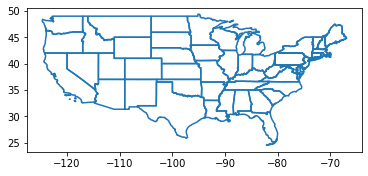

In [18]:
states.boundary.plot()

In [21]:
WA = states.loc[states['NAME'] == 'Washington']

<AxesSubplot:>

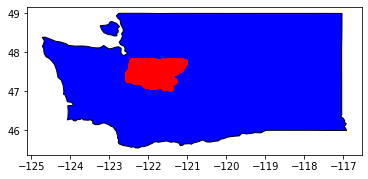

In [22]:
ax = states[states.NAME == 'Washington'].plot(color='blue', edgecolor='black')

gdf.plot(ax=ax, color='red')

In [ ]:
#conn.close()